In [1]:

#Number Crunching and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools

#Data Analysis Later
#import statsmodels.api as sm
import sklearn
from sklearn.svm import SVC
#import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


#Allow Multiple Outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




# What does the data look like?

In [23]:
df=pd.read_csv(r'district-18.csv')
df.dtypes
df.head()
df.info()
df.columns
df['Zip_Code']=df['Zip_Code'].astype('object')


SystemId                       int64
SystemName                    object
DistrictWebsite               object
Phone_Number                  object
Street                        object
City                          object
State                         object
Zip_Code                     float64
total_enroll                 float64
Grade                         object
SingleScore                  float64
pct_asian                    float64
pct_native                   float64
pct_black                    float64
pct_hispanic                 float64
pct_multi                    float64
pct_white                    float64
pct_ed                       float64
pct_swd                      float64
pct_lep                      float64
English_BegE                 float64
English_DevE                 float64
English_ProfE                float64
English_DistE                float64
Math_BegE                    float64
Math_DevE                    float64
Math_ProfE                   float64
M

,SystemId,SystemName,DistrictWebsite,Phone_Number,Street,City,State,Zip_Code,total_enroll,Grade,...,Soc_DevH,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE
0,601,Appling County,http://www.appling.k12.ga.us/,(912)367-8600,249 Blackshear Highway,Baxley,GA,31513.0,3410.0,C,...,33.9,38.6,11.4,72.6,41.6,88.8,NaN,NaN,11.2,NaN
1,602,Atkinson County,http://www.atkinson.k12.ga.us/,(912)422-7373,98 East Roberts Avenue,Pearson,GA,31642.0,1602.0,D,...,35.3,33.6,4.3,79.2,96.2,88.5,NaN,NaN,12.7,NaN
2,603,Bacon County,http://www.bcraiders.com/pages/Bacon_County,(912)632-7363,102 W. 4th Street,Alma,GA,31510.0,2040.0,C,...,32.7,33.3,0.0,74.4,34.1,94.3,NaN,NaN,14.3,NaN
3,604,Baker County,http://www.baker.k12.ga.us/,(229)734-5274,260 Highway 37,Newton,GA,39870.0,267.0,F,...,40.0,20.0,10.0,63.2,13.3,77.8,NaN,NaN,23.0,NaN
4,605,Baldwin County,https://www.bcbe.org/,(478)453-3303,110 N. ABC Street,Milledgeville,GA,31061.0,4934.0,F,...,34.4,22.8,1.7,43.3,45.1,92.3,NaN,NaN,14.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 78 columns):
SystemId                     212 non-null int64
SystemName                   212 non-null object
DistrictWebsite              212 non-null object
Phone_Number                 180 non-null object
Street                       180 non-null object
City                         180 non-null object
State                        180 non-null object
Zip_Code                     180 non-null float64
total_enroll                 183 non-null float64
Grade                        212 non-null object
SingleScore                  212 non-null float64
pct_asian                    183 non-null float64
pct_native                   183 non-null float64
pct_black                    183 non-null float64
pct_hispanic                 183 non-null float64
pct_multi                    183 non-null float64
pct_white                    183 non-null float64
pct_ed                       183 non-null float64
pct_

Index(['SystemId', 'SystemName', 'DistrictWebsite', 'Phone_Number', 'Street',
       'City', 'State', 'Zip_Code', 'total_enroll', 'Grade', 'SingleScore',
       'pct_asian', 'pct_native', 'pct_black', 'pct_hispanic', 'pct_multi',
       'pct_white', 'pct_ed', 'pct_swd', 'pct_lep', 'English_BegE',
       'English_DevE', 'English_ProfE', 'English_DistE', 'Math_BegE',
       'Math_DevE', 'Math_ProfE', 'Math_DistE', 'Science_BegE', 'Science_DevE',
       'Science_ProfE', 'Science_DistE', 'Soc_BegE', 'Soc_DevE', 'Soc_ProfE',
       'Soc_DistE', 'Third_Grade_Reading', 'Fifth_Grade_Reading',
       'English_BegM', 'English_DevM', 'English_ProfM', 'English_DistM',
       'Math_BegM', 'Math_DevM', 'Math_ProfM', 'Math_DistM', 'Science_BegM',
       'Science_DevM', 'Science_ProfM', 'Science_DistM', 'Soc_BegM',
       'Soc_DevM', 'Soc_ProfM', 'Soc_DistM', 'Eighth_Grade_Reading',
       'English_BegH', 'English_DevH', 'English_ProfH', 'English_DistH',
       'Math_BegH', 'Math_DevH', 'Math_ProfH', 

In [67]:
#Drop rows that don't have demographic data
demo_list=[
       'pct_asian', 'pct_native', 'pct_black', 'pct_hispanic', 'pct_multi',
       'pct_white', 'pct_ed', 'pct_swd', 'pct_lep', 'Mobility']

vf=df.dropna(subset=demo_list)
vf.head()
vf.info()

,SystemId,SystemName,DistrictWebsite,Phone_Number,Street,City,State,Zip_Code,total_enroll,Grade,...,Soc_DevH,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE
0,601,Appling County,http://www.appling.k12.ga.us/,(912)367-8600,249 Blackshear Highway,Baxley,GA,31513,3410.0,C,...,33.9,38.6,11.4,72.6,41.6,88.8,NaN,NaN,11.2,NaN
1,602,Atkinson County,http://www.atkinson.k12.ga.us/,(912)422-7373,98 East Roberts Avenue,Pearson,GA,31642,1602.0,D,...,35.3,33.6,4.3,79.2,96.2,88.5,NaN,NaN,12.7,NaN
2,603,Bacon County,http://www.bcraiders.com/pages/Bacon_County,(912)632-7363,102 W. 4th Street,Alma,GA,31510,2040.0,C,...,32.7,33.3,0.0,74.4,34.1,94.3,NaN,NaN,14.3,NaN
3,604,Baker County,http://www.baker.k12.ga.us/,(229)734-5274,260 Highway 37,Newton,GA,39870,267.0,F,...,40.0,20.0,10.0,63.2,13.3,77.8,NaN,NaN,23.0,NaN
4,605,Baldwin County,https://www.bcbe.org/,(478)453-3303,110 N. ABC Street,Milledgeville,GA,31061,4934.0,F,...,34.4,22.8,1.7,43.3,45.1,92.3,NaN,NaN,14.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 208
Data columns (total 78 columns):
SystemId                     180 non-null int64
SystemName                   180 non-null object
DistrictWebsite              180 non-null object
Phone_Number                 180 non-null object
Street                       180 non-null object
City                         180 non-null object
State                        180 non-null object
Zip_Code                     180 non-null object
total_enroll                 180 non-null float64
Grade                        180 non-null object
SingleScore                  180 non-null float64
pct_asian                    180 non-null float64
pct_native                   180 non-null float64
pct_black                    180 non-null float64
pct_hispanic                 180 non-null float64
pct_multi                    180 non-null float64
pct_white                    180 non-null float64
pct_ed                       180 non-null float64
pct_s

# Demographic Insights
## Do demographic factors correlate with higher/ lower scores on the CCRPI? 
## Do demographic factors correlate with each other? 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


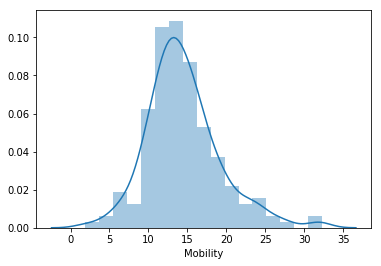

In [68]:
sb.distplot(vf['Mobility'])

In [69]:

for j in demo_list:
    g=sb.regplot(vf[j], vf['SingleScore'])
    g.figure.savefig(r'demo_scores/'+j+'.jpg')
    plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

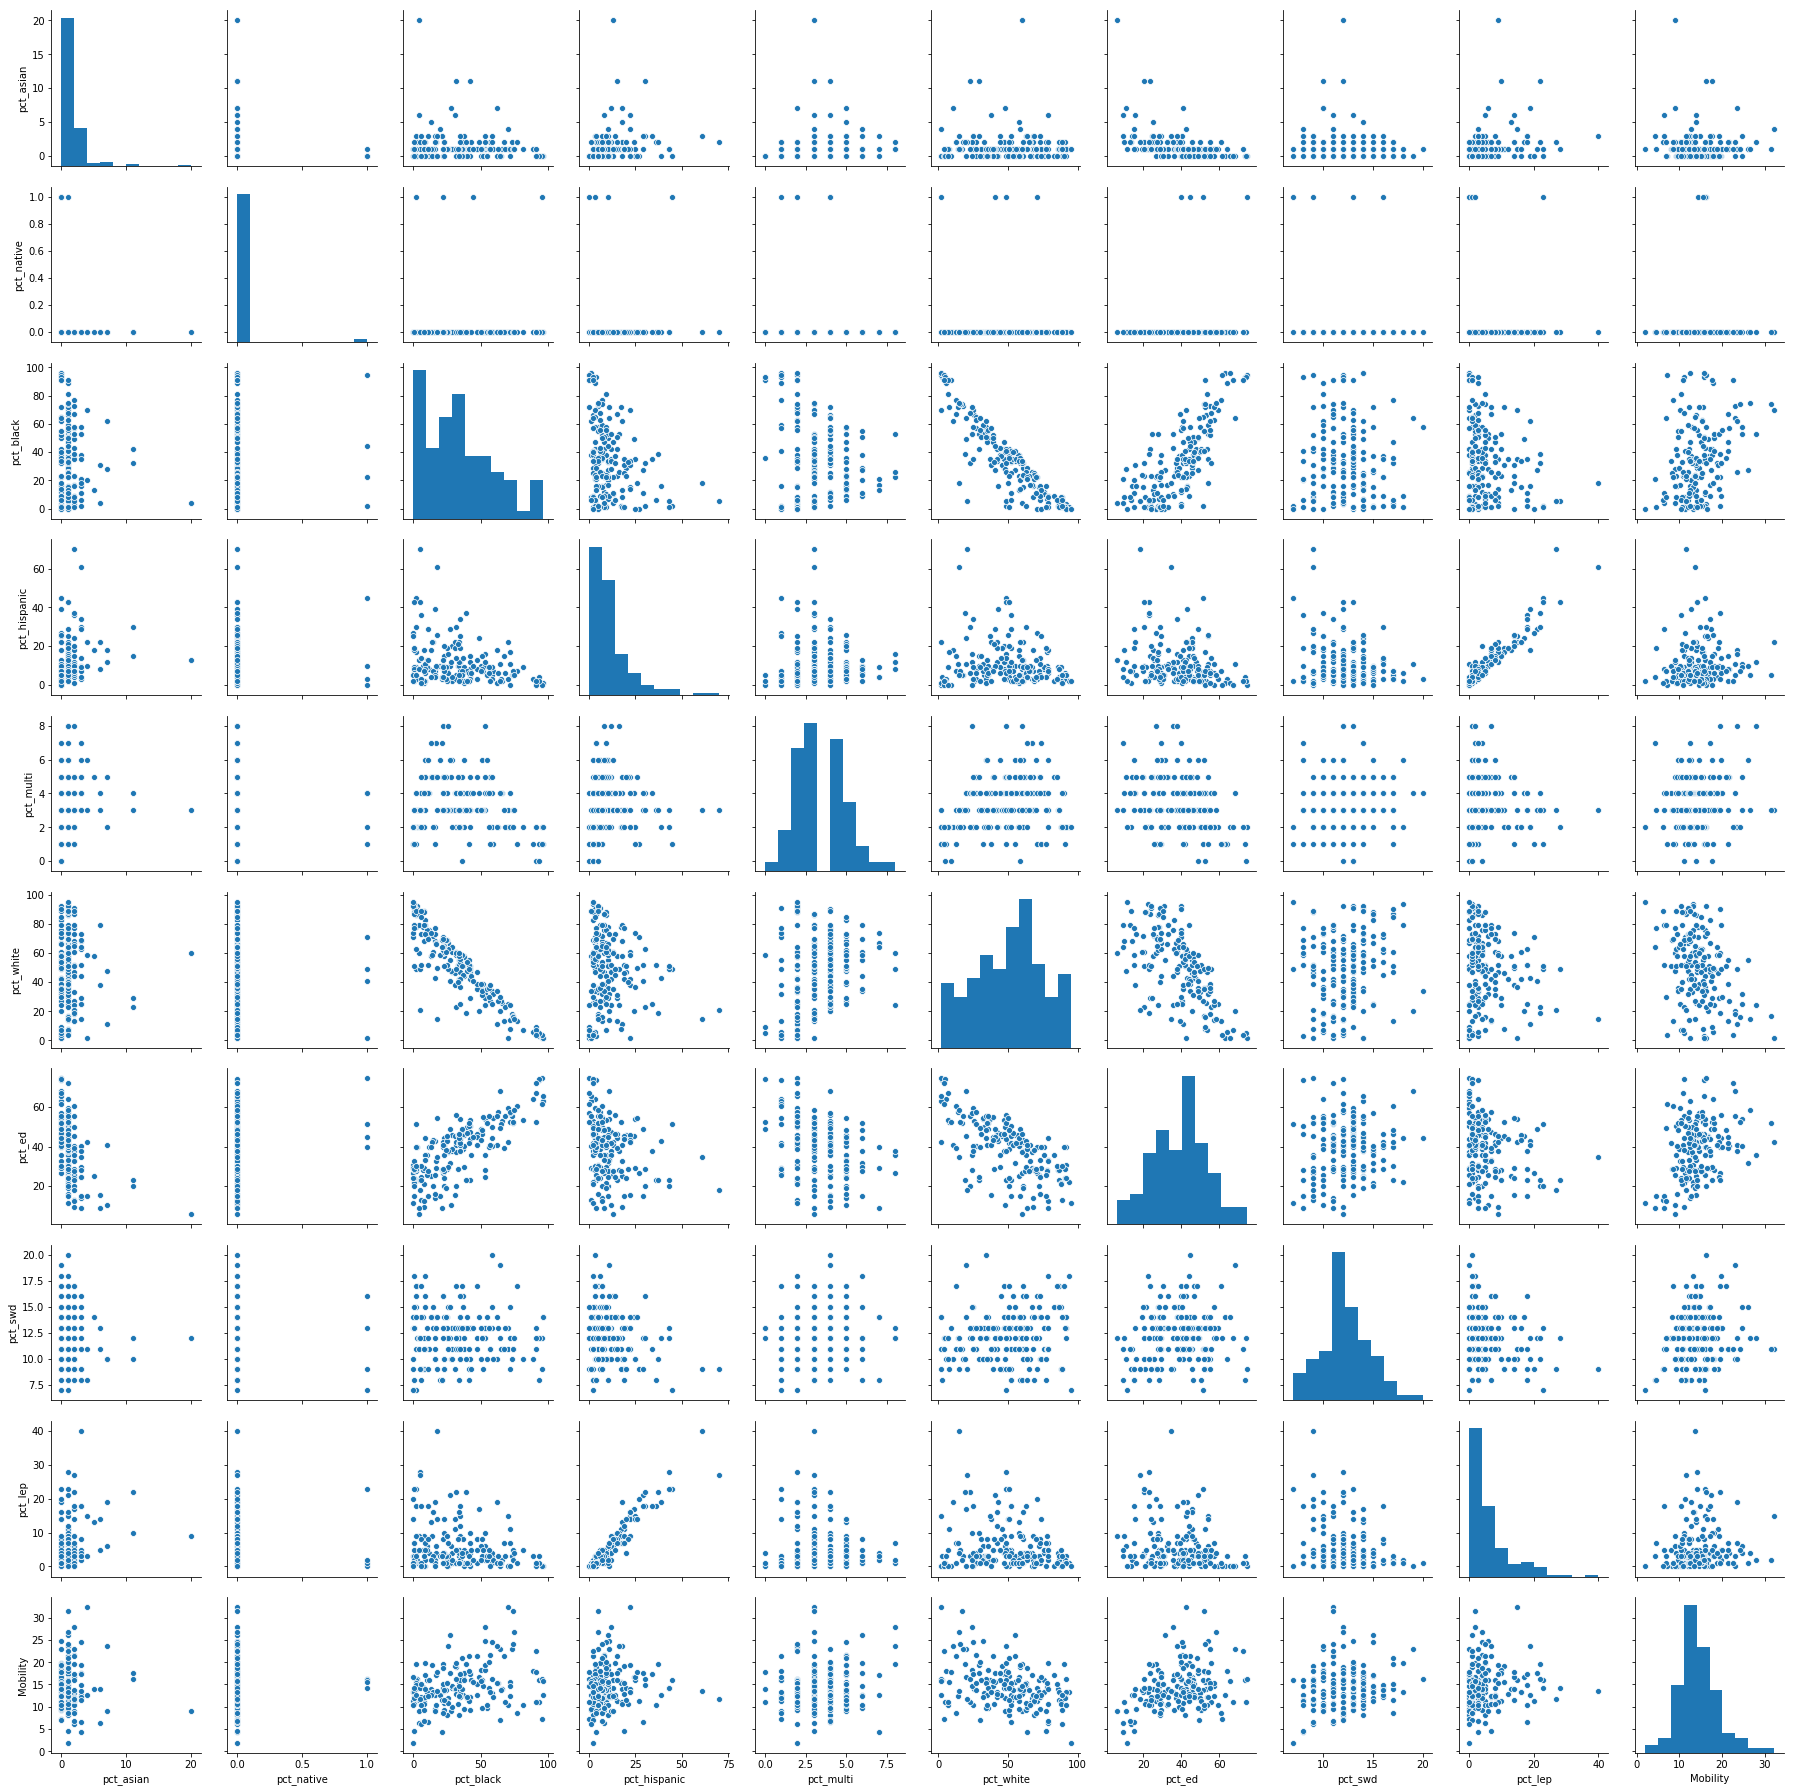

In [70]:
#Plot demographics against each other
sb.pairplot(vf[demo_list])

# Which districts are like Muscogee County? 
## Idea: Use clustering

In [79]:
from sklearn.cluster import KMeans
demo_list2=['total_enroll','pct_ed', 'pct_lep', 'pct_black', 'pct_white', 'Mobility']
#log_list=pd.concat([vf[['pct_asian', 'pct_native', 'pct_black', 'pct_hispanic', 'pct_multi',
       #'pct_white', 'pct_ed', 'pct_lep']], np.log(vf['total_enroll'])], axis=1)

num_groups=4
grouper=KMeans(num_groups, random_state=1)
grouper.fit(vf[demo_list2])
vf['Group']=grouper.predict(vf[demo_list2])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
vf.head()

,SystemId,SystemName,DistrictWebsite,Phone_Number,Street,City,State,Zip_Code,total_enroll,Grade,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
0,601,Appling County,http://www.appling.k12.ga.us/,(912)367-8600,249 Blackshear Highway,Baxley,GA,31513,3410.0,C,...,38.6,11.4,72.6,41.6,88.8,NaN,NaN,11.2,NaN,1
1,602,Atkinson County,http://www.atkinson.k12.ga.us/,(912)422-7373,98 East Roberts Avenue,Pearson,GA,31642,1602.0,D,...,33.6,4.3,79.2,96.2,88.5,NaN,NaN,12.7,NaN,1
2,603,Bacon County,http://www.bcraiders.com/pages/Bacon_County,(912)632-7363,102 W. 4th Street,Alma,GA,31510,2040.0,C,...,33.3,0.0,74.4,34.1,94.3,NaN,NaN,14.3,NaN,1
3,604,Baker County,http://www.baker.k12.ga.us/,(229)734-5274,260 Highway 37,Newton,GA,39870,267.0,F,...,20.0,10.0,63.2,13.3,77.8,NaN,NaN,23.0,NaN,1
4,605,Baldwin County,https://www.bcbe.org/,(478)453-3303,110 N. ABC Street,Milledgeville,GA,31061,4934.0,F,...,22.8,1.7,43.3,45.1,92.3,NaN,NaN,14.0,NaN,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


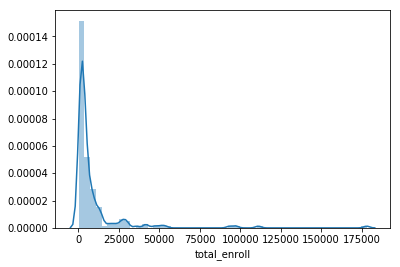

In [81]:
sb.distplot(vf['total_enroll'])

In [82]:
for j in range(num_groups):
    tf=vf[vf['Group']==j]
    #sb.pairplot(tf[demo_list])
    tf.describe()
vf['Group'].value_counts()

,SystemId,total_enroll,SingleScore,pct_asian,pct_native,pct_black,pct_hispanic,pct_multi,pct_white,pct_ed,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
count,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,0.0,0.0,17.000000,0.0,17.0
mean,668.000000,32533.411765,75.152941,3.411765,0.0,42.235294,12.647059,4.000000,37.529412,29.882353,...,35.211765,11.758824,56.941176,47.723529,85.411765,NaN,NaN,18.570588,NaN,0.0
std,41.030476,10793.666089,7.403894,4.556024,0.0,25.076207,8.992644,1.322876,19.981609,15.735082,...,8.378386,6.920265,10.925776,9.459158,5.476527,NaN,NaN,7.034981,NaN,0.0
min,611.000000,18950.000000,65.100000,1.000000,0.0,4.000000,5.000000,2.000000,2.000000,6.000000,...,19.300000,4.100000,34.700000,35.300000,71.700000,NaN,NaN,9.100000,NaN,0.0
25%,636.000000,26273.000000,70.700000,1.000000,0.0,23.000000,9.000000,3.000000,24.000000,19.100000,...,32.400000,6.900000,50.800000,40.700000,84.800000,NaN,NaN,13.500000,NaN,0.0
50%,658.000000,29209.000000,73.400000,2.000000,0.0,53.000000,10.000000,4.000000,30.000000,27.900000,...,34.300000,8.000000,58.500000,48.000000,87.000000,NaN,NaN,18.200000,NaN,0.0
75%,706.000000,41699.000000,79.000000,3.000000,0.0,58.000000,13.000000,5.000000,59.000000,40.200001,...,42.000000,17.000000,63.800000,52.100000,88.200000,NaN,NaN,23.000000,NaN,0.0
max,761.000000,53671.000000,90.400000,20.000000,0.0,74.000000,43.000000,6.000000,68.000000,55.299999,...,46.500000,25.800000,78.800000,72.100000,94.200000,NaN,NaN,32.300000,NaN,0.0


,SystemId,total_enroll,SingleScore,pct_asian,pct_native,pct_black,pct_hispanic,pct_multi,pct_white,pct_ed,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
count,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,0.0,0.0,159.000000,0.0,159.0
mean,694.72327,4106.031447,70.942767,0.993711,0.025157,33.333333,10.301887,3.283019,51.962264,40.281132,...,35.031847,7.955414,61.533758,44.675159,88.463057,NaN,NaN,13.976730,NaN,1.0
std,54.17341,3528.022538,8.120824,0.937927,0.157097,25.584228,10.936384,1.555440,24.049760,13.838724,...,11.283253,6.198743,11.840573,13.519306,5.496972,NaN,NaN,4.242808,NaN,0.0
min,601.00000,163.000000,51.100000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,...,3.400000,0.000000,20.300000,6.700000,75.700000,NaN,NaN,1.900000,NaN,1.0
25%,649.50000,1522.500000,65.450000,0.000000,0.000000,12.500000,3.000000,2.000000,36.000000,29.099999,...,29.500000,3.400000,53.600000,37.200000,84.300000,NaN,NaN,11.350000,NaN,1.0
50%,696.00000,3020.000000,71.200000,1.000000,0.000000,32.000000,7.000000,3.000000,52.000000,40.799999,...,36.100000,6.800000,61.800000,43.900000,89.300000,NaN,NaN,13.800000,NaN,1.0
75%,739.50000,5135.500000,76.400000,1.000000,0.000000,48.000000,13.000000,4.000000,69.500000,49.149999,...,43.300000,11.200000,69.400000,50.900000,92.600000,NaN,NaN,16.000000,NaN,1.0
max,793.00000,16262.000000,91.700000,6.000000,1.000000,96.000000,70.000000,8.000000,95.000000,74.400002,...,61.100000,32.400000,89.600000,98.600000,99.000000,NaN,NaN,28.000000,NaN,1.0


,SystemId,total_enroll,SingleScore,pct_asian,pct_native,pct_black,pct_hispanic,pct_multi,pct_white,pct_ed,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
count,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.0,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,3.000000,0.0,3.0
mean,645.666667,100665.666667,76.866667,8.000000,0.0,45.000000,18.333333,3.0,26.000000,26.566666,...,36.233333,17.300000,56.966667,51.100000,82.333333,NaN,NaN,18.400000,NaN,2.0
std,13.576941,9318.791034,5.987765,2.645751,0.0,15.716234,3.511885,1.0,13.747727,13.108903,...,6.261257,7.709086,6.016921,6.397656,6.401042,NaN,NaN,4.849742,NaN,0.0
min,633.000000,93448.000000,70.000000,6.000000,0.0,31.000000,15.000000,2.0,11.000000,15.400000,...,30.200000,9.100000,50.500000,44.300000,75.000000,NaN,NaN,14.000000,NaN,2.0
25%,638.500000,95405.500000,74.800000,6.500000,0.0,36.500000,16.500000,2.5,20.000000,19.349999,...,33.000000,13.750000,54.250000,48.150000,80.100000,NaN,NaN,15.800000,NaN,2.0
50%,644.000000,97363.000000,79.600000,7.000000,0.0,42.000000,18.000000,3.0,29.000000,23.299999,...,35.800000,18.400000,58.000000,52.000000,85.200000,NaN,NaN,17.600000,NaN,2.0
75%,652.000000,104274.500000,80.300000,9.000000,0.0,52.000000,20.000000,3.5,33.500000,32.149999,...,39.250000,21.400000,60.200000,54.500000,86.000000,NaN,NaN,20.600000,NaN,2.0
max,660.000000,111186.000000,81.000000,11.000000,0.0,62.000000,22.000000,4.0,38.000000,41.000000,...,42.700000,24.400000,62.400000,57.000000,86.800000,NaN,NaN,23.600000,NaN,2.0


,SystemId,total_enroll,SingleScore,pct_asian,pct_native,pct_black,pct_hispanic,pct_multi,pct_white,pct_ed,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
mean,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0
25%,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0
50%,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0
75%,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0
max,667.0,178065.0,83.0,11.0,0.0,32.0,30.0,4.0,23.0,20.299999,...,40.9,17.9,57.4,53.8,81.7,NaN,NaN,16.3,NaN,3.0


1    159
0     17
2      3
3      1
Name: Group, dtype: int64

In [83]:
#What cluster does MCSD belong to? 
musc_clust= vf.loc[vf['SystemName']=='Muscogee County']['Group'].values[0]
musc_clust
#vf['SystemName'].unique()

0

In [84]:
#Districts like Muscogee County
vf[vf['Group']==musc_clust]
vf[vf['Group']==musc_clust].select_dtypes(include='float64').describe()

,SystemId,SystemName,DistrictWebsite,Phone_Number,Street,City,State,Zip_Code,total_enroll,Grade,...,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE,Group
10,611,Bibb County,http://www.bibb.k12.ga.us/site/default.aspx?Pa...,(478)765-8502,484 Mulberry St,Macon,GA,31201,23237.0,D,...,19.3,4.1,51.5,35.9,78.5,NaN,NaN,23.0,NaN,0
24,625,Savannah-Chatham County,http://internet.savannah.chatham.k12.ga.us/def...,(912)395-5600,208 Bull St,Savannah,GA,31401,35954.0,C,...,34.2,7.9,58.5,43.1,86.6,NaN,NaN,21.6,NaN,0
27,628,Cherokee County,http://www.cherokee.k12.ga.us/Pages/Welcome.aspx,(770)479-1871,221 W. Main St.,Canton,GA,30114,41736.0,C,...,44.8,17.2,63.7,48.0,87.4,NaN,NaN,11.1,NaN,0
30,631,Clayton County,http://www.clayton.k12.ga.us/,(770)473-2700,1058 Fifth Avenue,Jonesboro,GA,30236,53671.0,D,...,26.8,5.3,34.7,35.3,71.7,NaN,NaN,32.3,NaN,0
35,636,Columbia County,http://www.ccboe.net/pages/Columbia_County,(706)541-0650,4781 Hereford Farm Road,Evans,GA,30809,26662.0,B,...,42.0,15.3,61.3,60.8,90.6,NaN,NaN,12.7,NaN,0
37,638,Coweta County,http://www.cowetaschools.org/,(770)254-2801,237 Jackson Street,Newnan,GA,30264,22178.0,B,...,41.3,17.9,65.8,52.1,84.8,NaN,NaN,13.5,NaN,0
47,648,Douglas County,http://www.douglas.k12.ga.us/,(770)651-2000,9030 Highway 5,Douglasville,GA,30134,26273.0,C,...,33.6,6.9,59.2,50.5,86.5,NaN,NaN,18.2,NaN,0
55,656,Fayette County,http://www.fcboe.org/,(770)842-0966,210 Stonewall Avenue West,Fayetteville,GA,30214,19777.0,B,...,43.9,24.3,68.7,54.2,88.8,NaN,NaN,9.1,NaN,0
57,658,Forsyth County,http://www.forsyth.k12.ga.us/site/default.aspx...,(770)887-2461,1120 Dahlonega Highway,Cumming,GA,30040,47233.0,A,...,44.8,25.8,78.8,72.1,94.2,NaN,NaN,9.1,NaN,0
68,669,Hall County,http://www.hallco.org/boe/site/,(770)534-1080,711 Green St. Suite 100,Gainesville,GA,30505,27064.0,C,...,34.8,8.0,63.8,45.7,88.2,NaN,NaN,14.1,NaN,0


,total_enroll,SingleScore,pct_asian,pct_native,pct_black,pct_hispanic,pct_multi,pct_white,pct_ed,pct_swd,...,Soc_DevH,Soc_ProfH,Soc_DistH,College_Readiness,Accelerated_Course_Taking,Four_Year_Graduation_Rate,CollegeEnrollment,FinancialEfficiency,Mobility,PPE
count,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,0.0,0.0,17.000000,0.0
mean,32533.411765,75.152941,3.411765,0.0,42.235294,12.647059,4.000000,37.529412,29.882353,11.588235,...,29.205882,35.211765,11.758824,56.941176,47.723529,85.411765,NaN,NaN,18.570588,NaN
std,10793.666089,7.403894,4.556024,0.0,25.076207,8.992644,1.322876,19.981609,15.735082,1.660528,...,4.193666,8.378386,6.920265,10.925776,9.459158,5.476527,NaN,NaN,7.034981,NaN
min,18950.000000,65.100000,1.000000,0.0,4.000000,5.000000,2.000000,2.000000,6.000000,8.000000,...,22.100000,19.300000,4.100000,34.700000,35.300000,71.700000,NaN,NaN,9.100000,NaN
25%,26273.000000,70.700000,1.000000,0.0,23.000000,9.000000,3.000000,24.000000,19.100000,11.000000,...,25.200000,32.400000,6.900000,50.800000,40.700000,84.800000,NaN,NaN,13.500000,NaN
50%,29209.000000,73.400000,2.000000,0.0,53.000000,10.000000,4.000000,30.000000,27.900000,12.000000,...,29.800000,34.300000,8.000000,58.500000,48.000000,87.000000,NaN,NaN,18.200000,NaN
75%,41699.000000,79.000000,3.000000,0.0,58.000000,13.000000,5.000000,59.000000,40.200001,12.000000,...,31.800000,42.000000,17.000000,63.800000,52.100000,88.200000,NaN,NaN,23.000000,NaN
max,53671.000000,90.400000,20.000000,0.0,74.000000,43.000000,6.000000,68.000000,55.299999,15.000000,...,35.300000,46.500000,25.800000,78.800000,72.100000,94.200000,NaN,NaN,32.300000,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

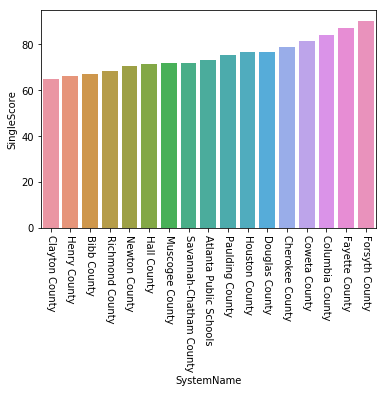

In [85]:
#Scores by District

score_order=vf[vf['Group']==musc_clust].sort_values('SingleScore')['SystemName'].unique()

sb.barplot(x='SystemName', y='SingleScore', data=vf[vf['Group']==musc_clust], order=score_order)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

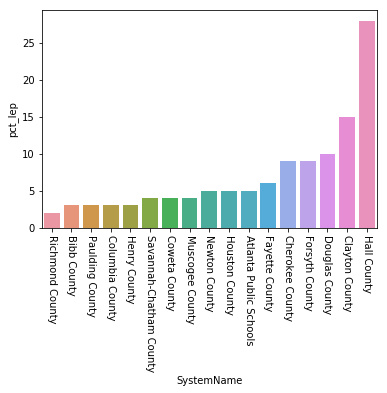

In [88]:

lep_order=vf[vf['Group']==musc_clust].sort_values('pct_lep')['SystemName'].unique()
sb.barplot(x='SystemName', y='pct_lep', data=vf[vf['Group']==musc_clust], order=lep_order)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

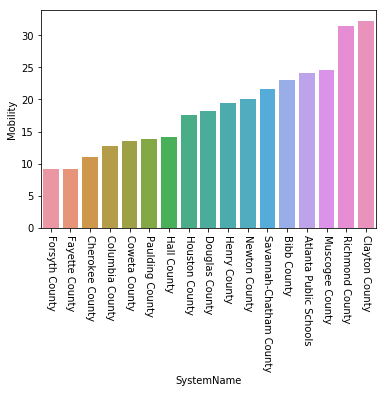

In [90]:
mob_order=vf[vf['Group']==musc_clust].sort_values('Mobility')['SystemName'].unique()
sb.barplot(x='SystemName', y='Mobility', data=vf[vf['Group']==musc_clust], order=mob_order)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

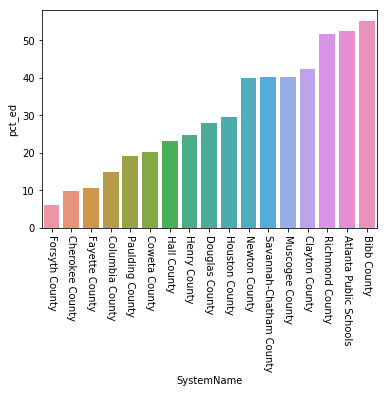

In [91]:
# Can we look at poverty metrics?
pov_order=vf[vf['Group']==musc_clust].sort_values('pct_ed')['SystemName'].unique()
sb.barplot(x='SystemName', y='pct_ed', data=vf[vf['Group']==musc_clust], order=pov_order)
plt.xticks(rotation=-90)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(40.2,71.7,'Musc')

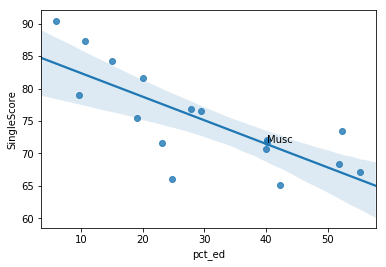

In [92]:
#Plot poverty vs. score
musc_pct= vf.loc[vf['SystemName']=='Muscogee County']['pct_ed'].values[0]
musc_score= vf.loc[vf['SystemName']=='Muscogee County']['SingleScore'].values[0]
g=sb.regplot(x='pct_ed', y='SingleScore', data=vf[vf['Group']==musc_clust])
g.text(musc_pct, musc_score, 'Musc')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(40.2,71.7,'Musc')

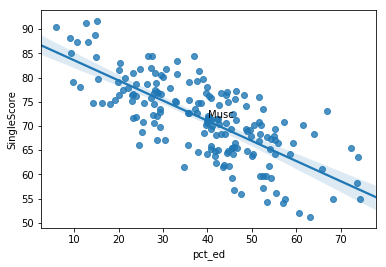

In [108]:
g=sb.regplot(x='pct_ed', y='SingleScore',  data=vf)
g.text(musc_pct, musc_score, 'Musc')
